Importing Libraries

In [40]:
import pandas as pd
from prophet import Prophet

Importing data from dataset.csv

In [41]:
data= pd.read_csv("dataset.csv")
#skipping last rows
data=data[:-2]
data.tail()

,INDIA quaterly data from 2010 to 2021,JEWELLRY demand in tonnes,PRICE (Rs/10gm),CONSUMER demand in tonnes
43,Q*4,137.3,"44,474.8",186.2
44,Q*1,126.5,"42,045.8",165.8
45,Q*2,94.3,"43,076.6",119.6
46,Q*3,125.1,"42,635.3",168.0
47,Q*4,265.0,"43,265.0",343.9


Preparing dataset

In [42]:
# Extract the quarter from the 'INDIA quarterly data from 2010 to 2021' column
data['Quarter'] = data['INDIA quaterly data from 2010 to 2021'].str.extract(r'(Q\*\d)')[0].str.replace('*', '')

# Create a list of years, each year repeated four times
years = []
for year in range(2010, 2022):
    years.extend([year] * 4)

# Add the 'Year' column to the dataframe
data['Year'] = years

# Create a new column 'ds' with the formatted date
data['ds'] = data.apply(lambda row: f"{row['Year']}-{row['Quarter']}", axis=1)
data['ds'] = pd.PeriodIndex(data['ds'], freq='Q').to_timestamp()

# Convert columns to numeric
data['jewelry_demand'] = pd.to_numeric(data['JEWELLRY demand in tonnes'], errors='coerce')
data['consumer_demand'] = pd.to_numeric(data['CONSUMER demand in tonnes'], errors='coerce')
data['price'] = pd.to_numeric(data['PRICE (Rs/10gm)'].str.replace(',', ''), errors='coerce')

# Drop any rows with NaN in the target columns
data = data.dropna(subset=['jewelry_demand', 'consumer_demand', 'price'])

# Display the cleaned data
data.head()


,INDIA quaterly data from 2010 to 2021,JEWELLRY demand in tonnes,PRICE (Rs/10gm),CONSUMER demand in tonnes,Quarter,Year,ds,jewelry_demand,consumer_demand,price
0,Q*1,190.9,"16,369.1",269.4,Q1,2010,2010-01-01,190.9,269.4,16369.1
1,Q*2,117.3,"17,590.7",177.1,Q2,2010,2010-04-01,117.3,177.1,17590.7
2,Q*3,166.6,"18,324.4",259.4,Q3,2010,2010-07-01,166.6,259.4,18324.4
3,Q*4,186.9,"19,708.9",295.8,Q4,2010,2010-10-01,186.9,295.8,19708.9
4,Q*1,198.8,"20,176.3",298.8,Q1,2011,2011-01-01,198.8,298.8,20176.3


Forecast Jewelry Demand

In [59]:
periods=4

In [60]:
from prophet import Prophet

# Forecast jewelry demand
model_jewelry = Prophet()
model_jewelry.fit(data[['ds', 'jewelry_demand']].rename(columns={'jewelry_demand': 'y'}))

# Create future dataframe
future_jewelry = model_jewelry.make_future_dataframe(periods=periods, freq='Q')

# Predict future jewelry demand
forecast_jewelry = model_jewelry.predict(future_jewelry)

# Display the forecast for jewelry demand
forecast_jewelry[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


15:39:30 - cmdstanpy - INFO - Chain [1] start processing
15:39:30 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\srb73\miniconda3\envs\tf\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  dates = pd.date_range(


,ds,yhat,yhat_lower,yhat_upper
47,2021-10-01,157.810078,118.290461,197.333041
48,2021-12-31,76.007791,33.544312,117.256124
49,2022-03-31,179.593038,138.462146,221.916659
50,2022-06-30,159.427194,119.529837,201.323691
51,2022-09-30,98.359049,56.249823,142.491696


Forecast Consumer Demand

In [61]:
# Forecast consumer demand
model_consumer = Prophet()
model_consumer.fit(data[['ds', 'consumer_demand']].rename(columns={'consumer_demand': 'y'}))

# Create future dataframe
future_consumer = model_consumer.make_future_dataframe(periods=periods, freq='Q')

# Predict future consumer demand
forecast_consumer = model_consumer.predict(future_consumer)

# Display the forecast for consumer demand
forecast_consumer[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


15:39:30 - cmdstanpy - INFO - Chain [1] start processing
15:39:30 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\srb73\miniconda3\envs\tf\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  dates = pd.date_range(


,ds,yhat,yhat_lower,yhat_upper
47,2021-10-01,200.897070,146.368335,256.678483
48,2021-12-31,77.477389,22.613175,132.241526
49,2022-03-31,209.164524,149.254874,262.990357
50,2022-06-30,171.811046,109.907725,227.094886
51,2022-09-30,95.078711,39.101666,150.126687


Forecast Price

In [62]:
# Forecast price
model_price = Prophet()
model_price.fit(data[['ds', 'price']].rename(columns={'price': 'y'}))

# Create future dataframe
future_price = model_price.make_future_dataframe(periods=periods, freq='Q')

# Predict future price
forecast_price = model_price.predict(future_price)

# Display the forecast for price
forecast_price[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


15:39:30 - cmdstanpy - INFO - Chain [1] start processing
15:39:30 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\srb73\miniconda3\envs\tf\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  dates = pd.date_range(


,ds,yhat,yhat_lower,yhat_upper
47,2021-10-01,43259.190190,40133.737223,46274.119962
48,2021-12-31,47397.491085,44710.441587,50225.816959
49,2022-03-31,36156.683744,33012.843827,38980.112402
50,2022-06-30,43988.421810,41388.804934,46916.843763
51,2022-09-30,44556.730442,41735.285383,47459.513651


Visualize the Forecasts

c:\Users\srb73\miniconda3\envs\tf\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\srb73\miniconda3\envs\tf\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


<Figure size 1000x600 with 0 Axes>

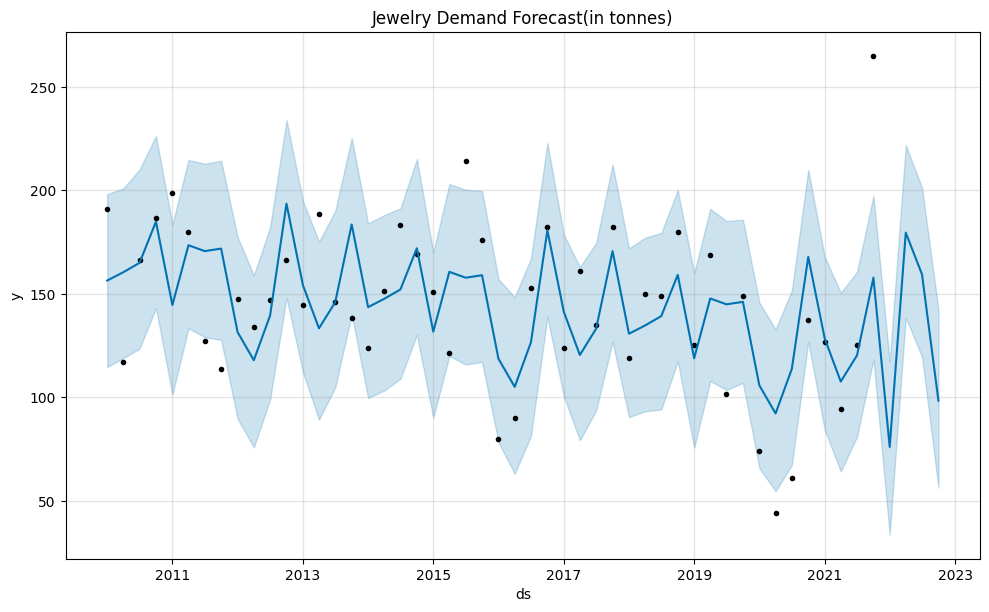

<Figure size 1000x600 with 0 Axes>

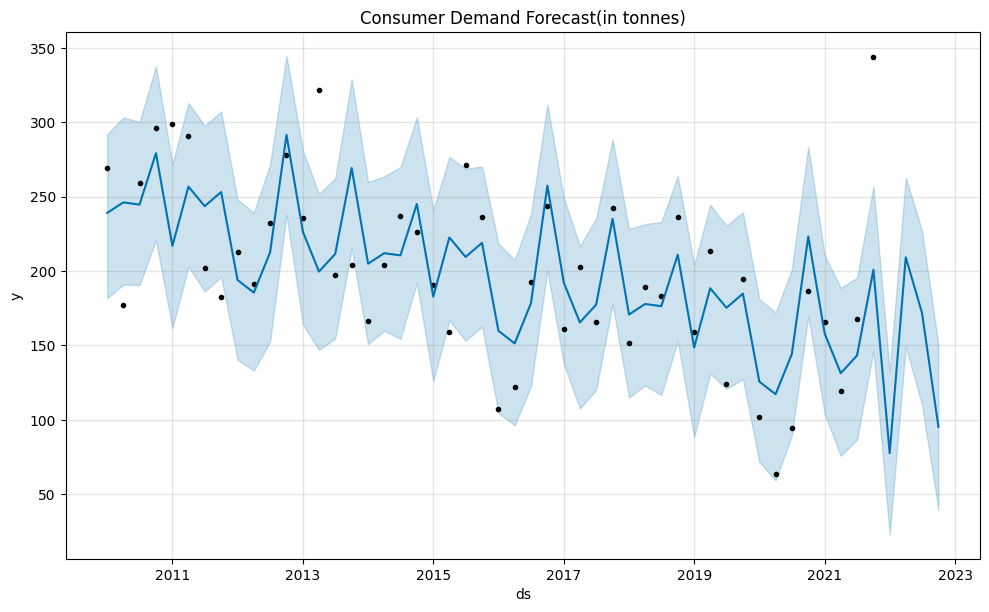

<Figure size 1000x600 with 0 Axes>

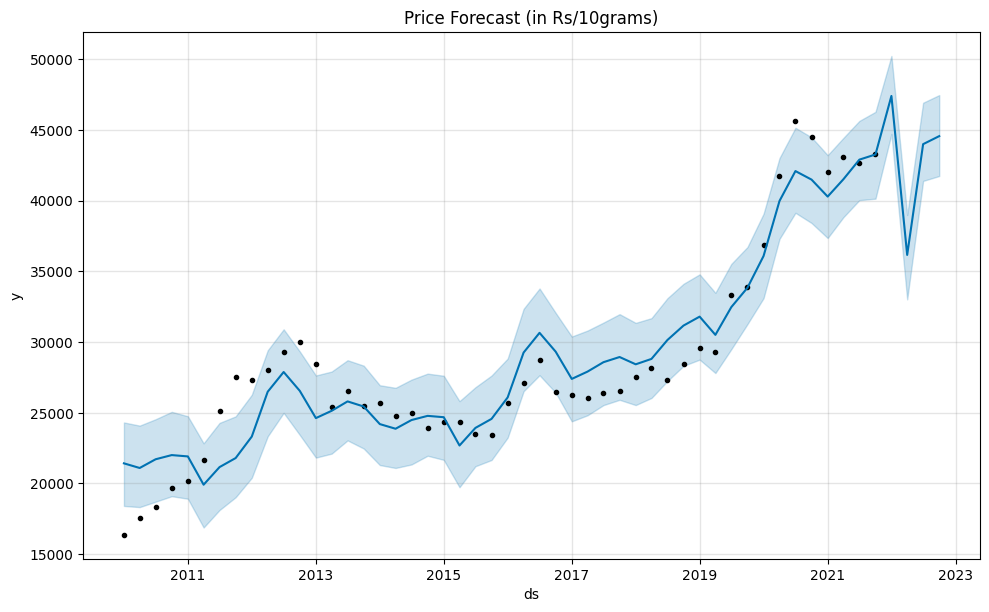

In [63]:
import matplotlib.pyplot as plt

# Plot the forecasts
plt.figure(figsize=(10, 6))
model_jewelry.plot(forecast_jewelry)
plt.title('Jewelry Demand Forecast(in tonnes)')
plt.show()

plt.figure(figsize=(10, 6))
model_consumer.plot(forecast_consumer)
plt.title('Consumer Demand Forecast(in tonnes)')
plt.show()

plt.figure(figsize=(10, 6))
model_price.plot(forecast_price)
plt.title('Price Forecast (in Rs/10grams)')
plt.show()
